In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

In [2]:
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import cv2
import matplotlib.pyplot as plt

## Connect to ROS

In [3]:
ri=RobotInterface( parseURL('package://irsl_mobile_arm/config/robot_interface.arm.yaml') )

/irsl_ws/src/irsl_mobile_arm/model/base_arm.body
loading model from /irsl_ws/src/irsl_mobile_arm/model/base_arm.body
joint: [{'name': 'default', 'topic': '/arm_controller/follow_joint_trajectory', 'type': 'action', 'joint_names': ['BASE_Y', 'BASE_R', 'BASE_P', 'ELBOW_P', 'ELBOW_Y', 'WRIST_P', 'WRIST_Y']}, {'name': 'gripper', 'topic': '/gripper_controller/follow_joint_trajectory', 'type': 'action', 'joint_names': ['GRIPPER0', 'GRIPPER1']}]
devices: [{'topic': '/joint_states', 'class': 'JointState', 'name': 'joint_state'}, {'topic': '/arm_controller/state', 'class': 'JointTrajectoryState', 'name': 'joint_trajectory_state'}]
mobile: {'type': 'geometry_msgs/Twist', 'topic': '/cmd_vel', 'baselink': 'Root', 'base_frame': 'base_link', 'map_frame': 'map', 'move_base_action': 'move_base', 'odom_frame': 'odom', 'odom_trajectory_action': 'omni_base_controller/follow_joint_trajectory'}


## Wait Image (ROS-message)

In [4]:
res = ri.oneShotSubscriber('/base_camera/image_raw', Image)

In [5]:
msg = res.waitData(timeout=5.0)

## Convert ROS-message to OpenCV Style

In [6]:
bridge = CvBridge()

In [7]:
img = bridge.imgmsg_to_cv2(msg, "bgr8")

## Show Image

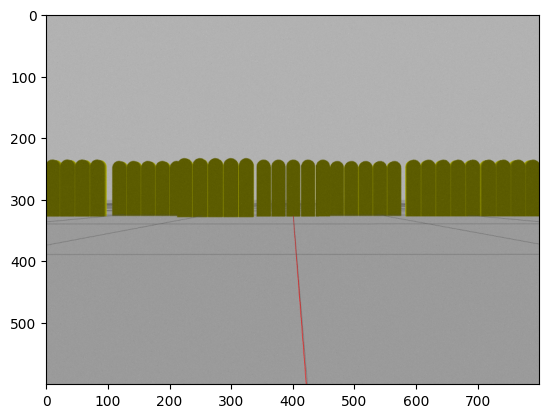

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()